In [61]:
#import relevant data libraries
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import plotly

In [62]:
#set path
path="/Users/celina/Desktop/Python"
os.chdir(path)

In [63]:
#load data from csv files
df = pd.read_csv('Regional Breakdown Stacked Graphs.csv')
df2 = pd.read_csv('Regional_Protein_Scenarios.csv')
df3 = pd.read_csv('FAOSTAT_data_2-11-2019.csv')
df4 = pd.read_csv('protein_change.csv')

Introduction

Nutritious food is critical to human development and will only become more so under rapid global population growth. Protein is an especially important macronutrient as it provides the building-blocks for early-stage development, which is a good predictor for overall life expectancy. Given the social, political, and economic implications of nutrition, it is important to understand how protein production and distribution will change in coming decades. Already, protein demand per person has risen steadily over recent decades (Figure below). 


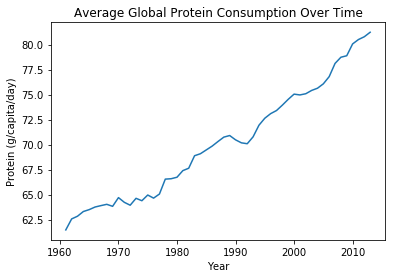

In [64]:
#simple line plot
plt.plot(df3['Year'],df3['Value'])
plt.title('Average Global Protein Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Protein (g/capita/day)')
plt.show()

As these trends continue, there are important environmental considerations: protein production in the forms of meat, dairy, and to a lesser extent soy have large carbon, land, and water footprints. In a world where climate change poses ever-growing threats, it is imperative protein be produced in environmentally sustainable, socially equitable ways. 

As such, it is important to answer the following questions:
-	Where will protein demand see the most growth?
-	Which regions of the world are equipped to supply protein to meet growing global demand? 
-	Under what scenarios can protein be equitably distributed without compromising global sustainability?


Methods

To address these questions, data were compiled from the Food and Agriculture Organization of the United Nation using their online data library, FAO-STAT. A time series of per capita protein consumption from 1961 to 2013 were collated by FAO-STAT for the following regions: Eastern Africa, Middle Africa, Western Africa, Southern Africa, Northern Africa, Melanesia, Western Asia, Central Asia, Southern Asia, South-Eastern Asia, Eastern Asia, Australia & New Zealand, Central America, Northern America, South America, Micronesia, Polynesia, Northern Europe, Western Europe, Southern Europe, Eastern Europe, and the Caribbean (inserted image below). Within these broader regions, country-level data were also obtained.

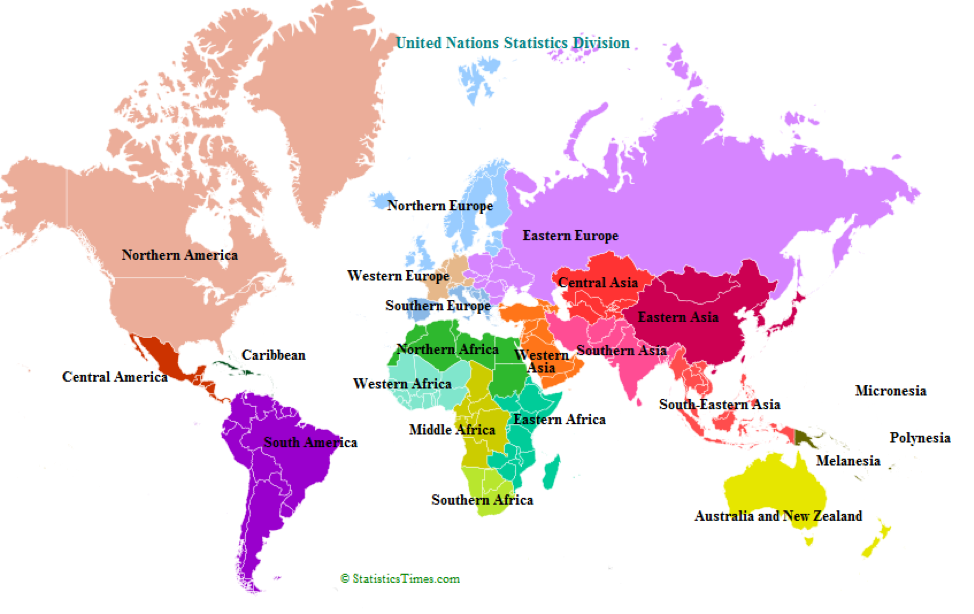

In [69]:
Image(filename="/Users/celina/Documents/WorldRegions_ProteinScenarios.png")

To better understand the dataset, I produced summary statistics. Additionally, to get an idea of the data's distribution, I produced a histogram and boxplot (explained below). 

In [59]:
df.iloc[:,0:4].describe()

,Plant-Based,Seafood,Meat
count,22.000000,22.000000,22.000000
mean,49.086583,5.990721,21.984354
std,15.821146,6.357203,10.409316
min,25.290893,0.000000,3.009598
25%,36.250187,2.069564,15.519602
50%,51.405697,4.954842,22.236600
75%,57.018629,5.809308,28.100292
max,78.534863,28.947368,40.530839


The summary statistics above indicate that in 2013, the average regional protein consumption (in grams per person per day) were as follow: 49.1 for plant-based, 6 for seafood, 22 for meat, and 13.4 for animal byproducts. The largest spread was for plant-based protein, which has a standard deviation of 15.8. Interestingly, there were some regions that did not rely on seafood for protein at all (Seafood min = 0.0). 

In [8]:
df2.describe()

,2050 at respective 2013 consumption,2050 at global avg rate of consumption (81.23g),2050 at EU rate of consumption (103.85g),2050 at China/Hong Kong rate of consumption (129.18),2050 at recommended protein intake (50g)
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,48.471350,55.452569,98.741220,147.216089,-4.313327
std,48.021018,81.994684,104.827625,130.396077,50.470691
min,-11.999195,-26.623841,-6.190889,16.690043,-54.834323
25%,22.254382,3.280139,32.040409,64.246317,-36.427343
50%,35.997768,36.431462,74.423333,116.966839,-16.021505
75%,61.346364,60.325703,104.971368,154.965829,-1.313737
max,165.852327,247.916619,344.800454,453.291503,114.155250


Here we see summary statistics for the change in regional protein consumption under various scenarios. The greatest mean change in protein consumption is under the China/Hong Kong rate, which would, on average, raise regional protein consumption by 147.22 grams of protein per person per day.

In [23]:
#as a reminder of how this dataset is structured
df3.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,5000,World,674,Protein supply quantity (g/capita/day),2901,Grand Total,1961,1961,g/capita/day,61.46,Fc,Calculated data
1,FBS,Food Balance Sheets,5000,World,674,Protein supply quantity (g/capita/day),2901,Grand Total,1962,1962,g/capita/day,62.56,Fc,Calculated data
2,FBS,Food Balance Sheets,5000,World,674,Protein supply quantity (g/capita/day),2901,Grand Total,1963,1963,g/capita/day,62.83,Fc,Calculated data
3,FBS,Food Balance Sheets,5000,World,674,Protein supply quantity (g/capita/day),2901,Grand Total,1964,1964,g/capita/day,63.30,Fc,Calculated data
4,FBS,Food Balance Sheets,5000,World,674,Protein supply quantity (g/capita/day),2901,Grand Total,1965,1965,g/capita/day,63.49,Fc,Calculated data


In [24]:
#because the only output column is 'Value,' it's the only one we're interested in
df3['Value'].describe()

count    53.000000
mean     70.149811
std       5.662599
min      61.460000
25%      64.640000
50%      70.080000
75%      74.960000
max      81.230000
Name: Value, dtype: float64

Between 1961 and 2013, the average global per capita protein consumption was 70.15 grams per day, where the minimum in a single year was 61.46g and maximum 81.23g. These statistics are demonstrated visually in the plots below. 

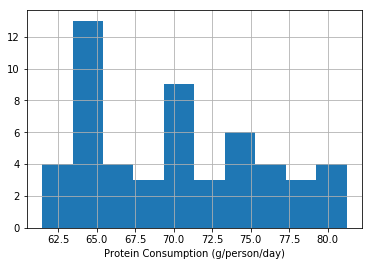

In [30]:
df3['Value'].hist()
plt.xlabel('Protein Consumption (g/person/day)')
plt.show()

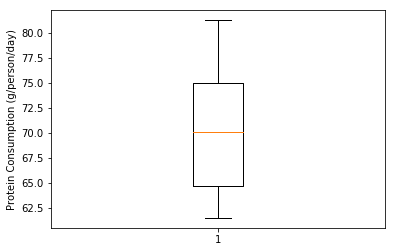

In [29]:
plt.boxplot(df3['Value'])
plt.ylabel('Protein Consumption (g/person/day)')
plt.show()

From the charts above, we can see that the data are not normally distributed. This makes sense, as we saw above that global protein consumption has risen steadily since 1960. 

The following stacked bar graph shows the breakdown of regional protein consumption between plant-based protein, seafood, meat, and animal products. These data were compiled from the FAO Statistics site and represent 2013 levels. The stacked nature of the bars allows the viewer to compare regions for their primary protein sources.

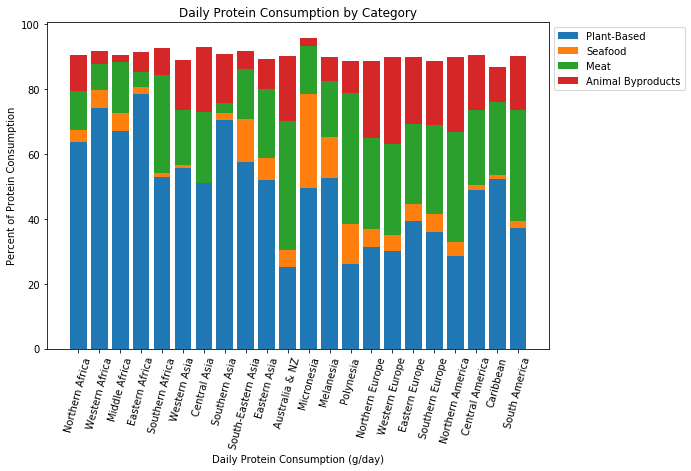

In [64]:
#enlarge figure size from default
plt.figure(figsize=(9,6))

#set 4 columns of csv to be plotted
p1 = plt.bar(df['Region'], df['Plant-Based'])
#set bottom to previous bars added together so they don't overlap
p2 = plt.bar(df['Region'], df['Seafood'], bottom=df['Plant-Based'])
p3 = plt.bar(df['Region'], df['Meat'], bottom=df['Plant-Based']+df['Seafood']) 
p4 = plt.bar(df['Region'], df['Animal Byproducts'], bottom=df['Plant-Based']+df['Seafood']+df['Meat'])
plt.title('Daily Protein Consumption by Category')

#set legend to the side of the figure
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Plant-Based', 'Seafood', 'Meat', 'Animal Byproducts'), 
           bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Daily Protein Consumption (g/day)')
#rotate x-tick labels to make them readable
plt.xticks(rotation=75)
plt.ylabel('Percent of Protein Consumption')
plt.show()

These subplots demonstrate scenarios for the change in regional protein consumption by 2050. The first shows how protein consumption will change based on regional population changes alone. The second shows what would happen to regional protein consumption if the entire world ate at the current global average of 81.23g per person per day. The third demonstrates change in regional protein consumption if all people were to consume at current European (EU) rates of 81.23 grams per day; the fourth, at current Chinese/Hong Kong rates of 129.18 grams. The final, fifth, subplot shows how regional protein intake would change if, by 2050, global populations only consumed as much protein as is recommended by the World Health Organization, 50 grams per person per day. 

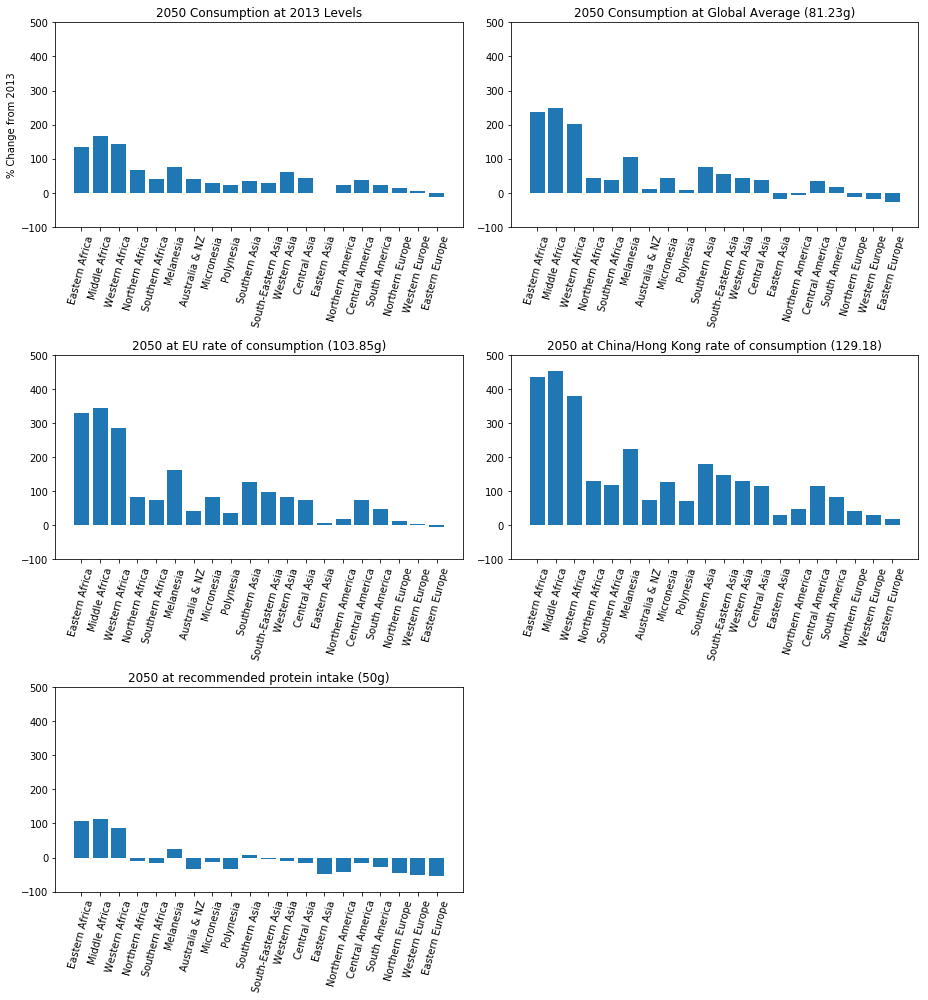

In [60]:
#adjust figure size from default
plt.figure(figsize=(13, 14))

#declare subplot with dimensions 3 rows by 2 columns, first of five subplots
plt.subplot(3,2,1)
plt.bar( df2['Region'],df2['2050 at respective 2013 consumption'])
plt.xticks(rotation=75)
#standardize y-axis min/bottom and max/top to make plots visually comparable
plt.ylim(top = 500, bottom = -100)
plt.ylabel('% Change from 2013')
plt.title('2050 Consumption at 2013 Levels')
#plt.show()

plt.subplot(3,2,2)
plt.bar(df2['Region'], df2['2050 at global avg rate of consumption (81.23g)'])
plt.xticks(rotation=75)
plt.ylim(top = 500, bottom = -100)
plt.title('2050 Consumption at Global Average (81.23g)')
#plt.show()

plt.subplot(3,2,3)
plt.bar(df2['Region'], df2['2050 at EU rate of consumption (103.85g)'])
plt.xticks(rotation=75)
plt.ylim(top = 500, bottom = -100)
plt.title('2050 at EU rate of consumption (103.85g)')
#plt.show()

plt.subplot(3,2,4)
plt.bar(df2['Region'], df2['2050 at China/Hong Kong rate of consumption (129.18)'])
plt.xticks(rotation=75)
plt.ylim(top = 500, bottom = -100)
plt.title('2050 at China/Hong Kong rate of consumption (129.18)')
#plt.show()

plt.subplot(3,2,5)
plt.bar(df2['Region'], df2['2050 at recommended protein intake (50g)'])
plt.xticks(rotation=75)
plt.ylim(top = 500, bottom = -100)
plt.title('2050 at recommended protein intake (50g)')

plt.tight_layout()
plt.show()


The following maps show geospatially how protein consumption would change under the scenarios defined above. Run the code for each one; the map will appear in a new window.

This first map shows changes in country-level protein consumption by 2050 assuming
consumption per capita remains stagnant from 2013 levels. The change, then, is
based solely on projected population growth.

In [56]:
prot_chang_val = df4.iloc[:,1]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale=True,
        locations = df4['country_code'],
        z = prot_chang_val,
        zmax = 500,
        zmin = -20,
        text = df4['percent_change_2013rates'],
        fill_opacity = 0.1,

        colorbar = dict(
            title = 'Change(%)',
            titlefont=dict(size=16),
            tickfont=dict(size=12)),
        ) ]
# Define layout
layout = dict(
    title = 'Change in Protein Consumption (%): 2013 to 2050',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )
# Plot
fig = dict( data=data, layout=layout )
plotly.offline.plot(fig, validate=False)



'file:///Users/celina/Desktop/Python/temp-plot.html'

The following map shows changes in country-level protein consumption by 2050 assuming
consumption per capita is global average consumption rate (81.23g).

In [ ]:
prot_chang_val2 = df4.iloc[:,5]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale=True,
        locations = df4['country_code'],
        z = prot_chang_val2,
        zmax = 500,
        zmin = -20,
        text = df4['percent_change_av_rate'],
        fill_opacity = 0.1,

        colorbar = dict(
            title = 'Change(%)',
            titlefont=dict(size=16),
            tickfont=dict(size=12)
            )
      ) ]
# Define layout
layout = dict(
    title = 'Change in Protein Consumption (%): 2050 at global average (81.23g)',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )
# Plot
fig = dict( data=data, layout=layout )
plotly.offline.plot(fig, validate=False, filename='world_av.html')


This map shows changes in country-level protein consumption by 2050 assuming
consumption per capita is at EU rate of consumption (103.85g).

In [ ]:
prot_chang_val3 = df4.iloc[:,8]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale=True,
        locations = df4['country_code'],
        z = prot_chang_val3,
        zmax = 500,
        zmin = -20,
        text = df4['percent_change_eu'],
        fill_opacity = 0.1,

        colorbar = dict(
            title = 'Change(%)',
            titlefont=dict(size=16),
            tickfont=dict(size=12)
            )
      ) ]
# Define layout
layout = dict(
    title = 'Change in Protein Consumption (%): 2050 at EU rate (103.85g)',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )
# Plot
fig = dict( data=data, layout=layout )
plot_url = plotly.offline.plot(fig, validate=False, filename='world_eu.html')

This map shows changes in country-level protein consumption by 2050 assuming
consumption per capita is at China/Hong Kong rate of consumption (129.18g).

In [ ]:
prot_chang_val4 = df4.iloc[:,11]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale=True,
        locations = df4['country_code'],
        z = prot_chang_val4,
        zmax = 500,
        zmin = -20,
        text = df4['percent_change_china'],
        fill_opacity = 0.1,

        colorbar = dict(
            title = 'Change(%)',
            titlefont=dict(size=16),
            tickfont=dict(size=12)
            )
      ) ]
# Define layout
layout = dict(
    title = 'Change in Protein Consumption (%): 2050 at China/HK rate (129.18g)',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )
# Plot
fig = dict( data=data, layout=layout )
plot_url = plotly.offline.plot(fig, validate=False, filename='world_china.html')

This map shows changes in country-level protein consumption by 2050 assuming
consumption per capita is at recommended rate of consumption (50g).

In [ ]:
prot_chang_val5 = df4.iloc[:,14]

# Define the data to be visualised and some of the parameters of the visualisation
data = [ dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale=True,
        locations = df4['country_code'],
        z = prot_chang_val5,
        zmax = 500,
        zmin = -20,
        text = df4['percent_change_recommend'],
        fill_opacity = 0.1,

        colorbar = dict(
            title = 'Change(%)',
            titlefont=dict(size=16),
            tickfont=dict(size=12)
            )
      ) ]
# Define layout
layout = dict(
    title = 'Change in Protein Consumption (%): 2050 at recommended rate (50g)',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
              )
             )
# Plot
fig = dict( data=data, layout=layout )
plot_url = plotly.offline.plot(fig, validate=False, filename='world_rec.html')

Conclusion

In this project, I explored the history of global protein consumption, finding that average consumption has followed a general rising trend from 1960 to 2013. I was also able to model five scenarios of future growth in protein consumption (from 2013 to 2050). Through these models, I demonstrated that growth in consumption would be greatest if the world were to model its eating habits off of China's (at 2013 levels, 129.18g) and least if modeled off of the recommended intake (50g). Further, I provided geospatial representation of these potential trends using global choropleth maps. 

In sum, this project provides a foundation for understanding how protein consumption might change in coming decades. As discussed in the introduction, this is important for a number of reasons. Most basically, it illustrates demand trends that must be met by global markets-- if citizens around the world begin to eat as the Chinese currently do, that protein will have to be sourced from somewhere. More importantly, it provides information on how to balance global nutrition and environmental sustainability needs. Animal agriculture, and to a lesser extent certain crops such as soy, have disproportionate land, water, and nutrient demands. It is likely that scenarios of greater growth in global protein demand would have catastrophic environmental repercussions.

To build on the work I have done for this project, I would explore the greenhouse gas emissions associated with the scenarios I mapped out. I would additionally explore scenarios of growth in plant-based proteins as opposed to meat- or animal byproduct-based proteins. I would ask: based on previous trends of growth, which sectors are likely to grow in the future and at what rates? What levels of GHG emissions would be associated under various growth scenarios?